<a href="https://colab.research.google.com/github/Katie-Moses/DSPS_KMoses/blob/main/HW2/KMoses_Bayesian_posteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do priors matter??

I worked in collaboration with one Zoe Beris, Alex Bruce, and TJ Tomaszewski.

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

TASK 1: Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.


TASK 2: Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

TASK 3: Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal.

Your should end up with a plot of the posterior linelihood and prior in the same plot for each of the four posterior distributions (4 plots). EACH PLOT SHOULD BE FOLLOWED BY A CAPTION DESCRIBING THE WHAT THE WHY AND THE "WOW"



In [62]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(661)

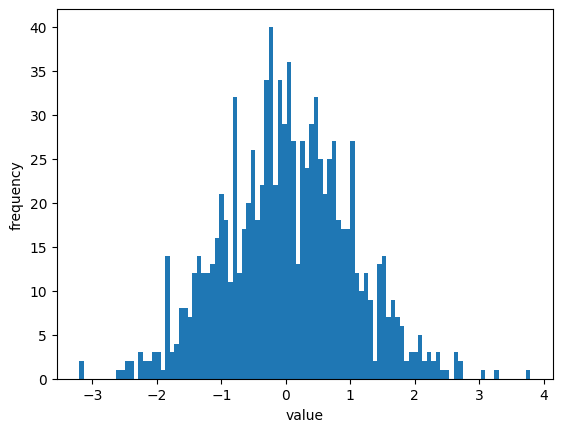

In [63]:
stats.norm.rvs?
Norm_0 = stats.norm.rvs(0, 1, 1000)
plt.hist(Norm_0, bins=100)
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

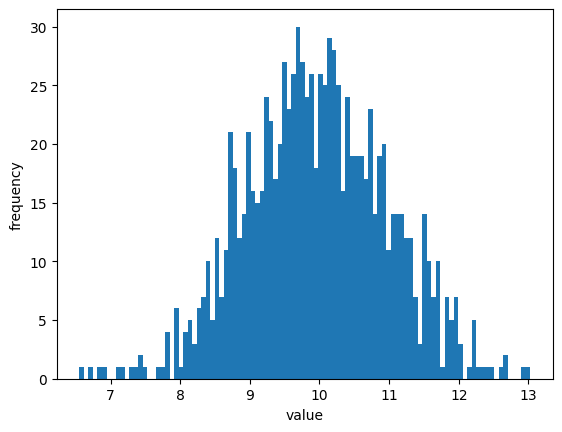

In [64]:
Norm_10 = stats.norm.rvs(10, 1, 1000)
plt.hist(Norm_10, bins=100)
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

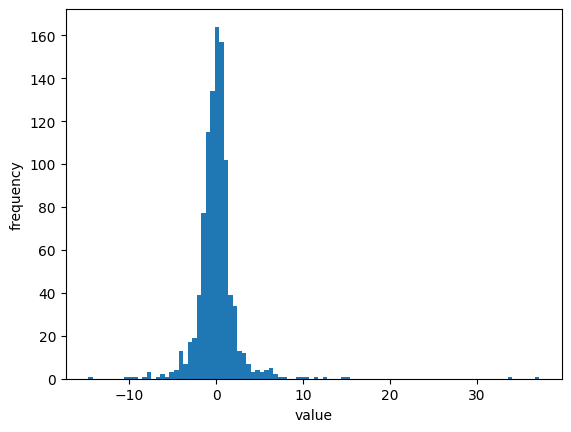

In [81]:
tStudent_0 = stats.t.rvs(df=2,loc=0,size=1000)
plt.hist(tStudent_0, bins=100)
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

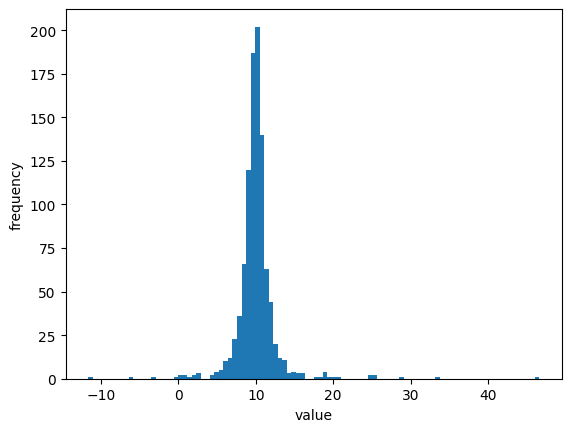

In [83]:
tStudent_10 = stats.t.rvs(df=2,loc=10,size=1000)
plt.hist(tStudent_10, bins=100)
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

In [142]:
def posterior(prior, likelihood):
  normalized_prior = prior / sum(prior)
  normalized_likelihood = likelihood / sum(likelihood)
  x = np.linspace(0.,1,len(prior))
  this_posterior = normalized_prior*normalized_likelihood
  this_posterior = this_posterior / sum(this_posterior)
  plt.plot(x, normalized_prior, label = "prior", color='black', ls = '--')
  plt.plot(x, normalized_likelihood, label = "likelihood", color='black', ls = '-')
  plt.plot(x, this_posterior, label = "posterior", color='red', ls = '-')
  #plt.xlabel.... #all plots need axis labels!!
  #plt.ylabel.... #all plots need axis labels!!
  plt.legend()
  plt.show()

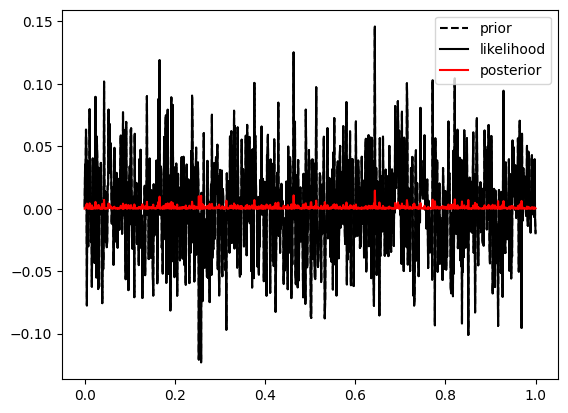

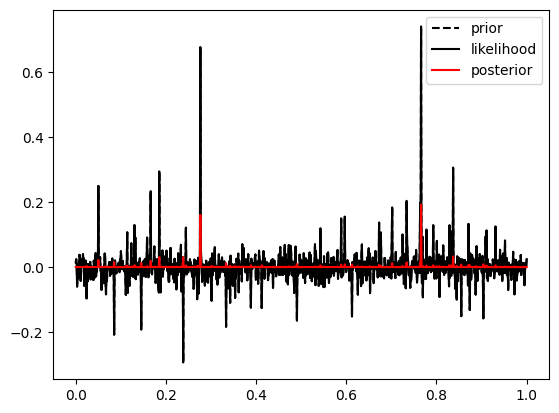

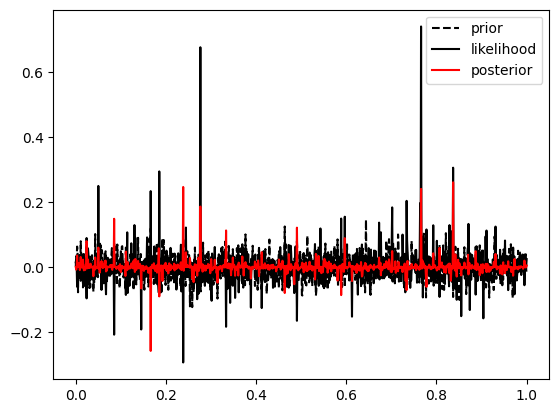

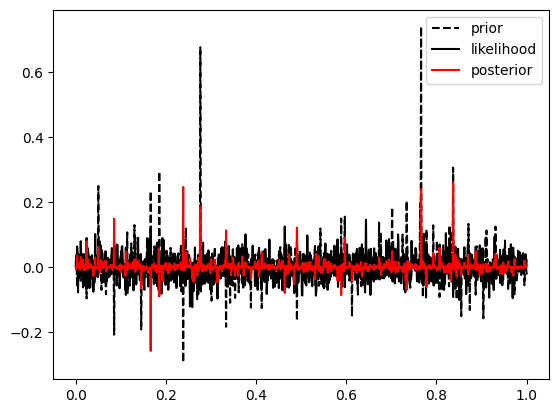

In [143]:
#function call
posterior(Norm_0,Norm_0)
posterior(tStudent_0,tStudent_0)
posterior(Norm_0,tStudent_0)
posterior(tStudent_0,Norm_0)

**Fig 1:** ....

In [ ]:
......